# Week 2 Analysis Notebook

This notebook is for tasks completed in week 2. The initial goal is to expand on the work done on the full spectrum galaxy SED as described in the journal mainly looking at evolution over time (by looking at redshift) and categorising the galaxies into different bins eg. quenches, mass.

Need to begin by symlinking data from Simba directory in cuillin to here because now need to access data across redshifts. Sticking to 25 Mpc/h volume with 2x256^3 particles but for all redshifts initially. File 151 is z=0 and they go inversely.

In [4]:
from pathlib import Path
import re
import numpy as np
import h5py
import caesar
import astropy.units as u
from astropy.constants import c
import matplotlib.pyplot as plt

import os
os.environ['SPS_HOME'] = '/home/spujni/fsps'
import fsps

import sys
sys.path.insert(0, '../src')
from week_2_funcs import get_redshift, list_snapshots, compute_summed_sed_from_appmags, compute_summed_sed_from_absmags, get_stellar_mass_bins, classify_galaxies

CAT_DIR = Path("/home/spujni/sim/m50n512/s50/Groups/")

yt : [INFO     ] 2026-01-30 15:27:40,272 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_150.hdf5
yt : [INFO     ] 2026-01-30 15:27:40,302 Found 58084 halos
yt : [INFO     ] 2026-01-30 15:27:40,314 Found 6892 galaxies
yt : [INFO     ] 2026-01-30 15:27:40,481 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_145.hdf5
yt : [INFO     ] 2026-01-30 15:27:40,491 Found 58755 halos
yt : [INFO     ] 2026-01-30 15:27:40,496 Found 6594 galaxies
yt : [INFO     ] 2026-01-30 15:27:40,616 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_135.hdf5
yt : [INFO     ] 2026-01-30 15:27:40,626 Found 60182 halos
yt : [INFO     ] 2026-01-30 15:27:40,631 Found 6180 galaxies
yt : [INFO     ] 2026-01-30 15:27:40,746 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_120.hdf5
yt : [INFO     ] 2026-01-30 15:27:40,756 Found 62959 halos
yt : [INFO     ] 2026-01-30 15:27:40,760 Found 5475 galaxies
yt : [INFO     ] 2026-01-30 15:27:40,862 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_110.hdf5
yt : [INFO

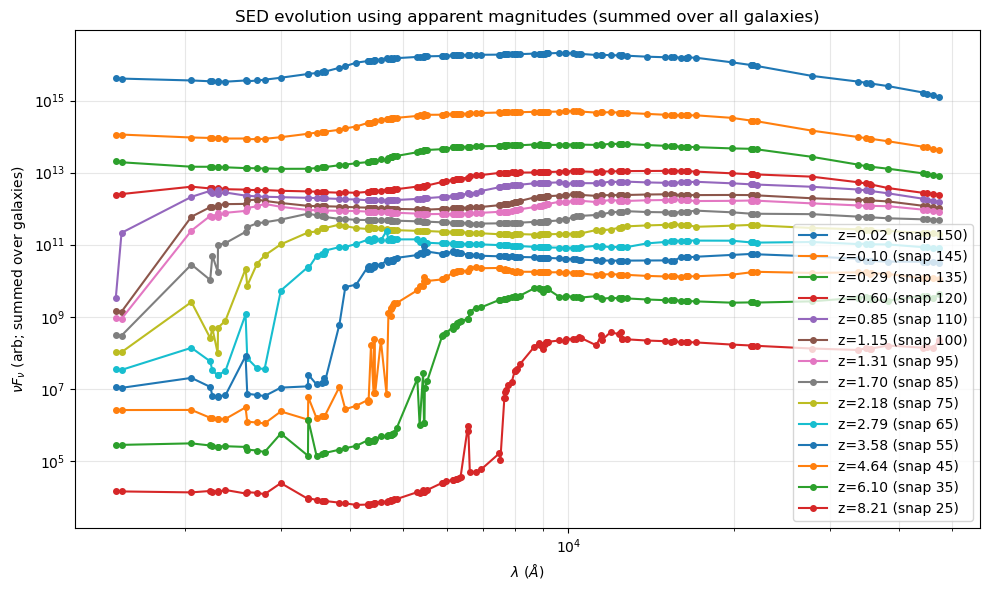

In [5]:
### Apparent magnitudes-based SED
snaps = list_snapshots()
snap_nums = [150, 145, 135, 120, 110, 100, 95, 85, 75, 65, 55, 45, 35, 25]  # adjust as desired

plt.figure(figsize=(10, 6))

for snap, path in snaps:
    if snap not in snap_nums:
        continue

    obj = caesar.load(path)
    z = get_redshift(obj)

    lam_AA, nuFnu, _ = compute_summed_sed_from_appmags(path)
    plt.loglog(lam_AA, nuFnu, marker="o", linewidth=1.5, markersize=4, label=f"z={z:.2f} (snap {snap})")

# plt.gca().invert_xaxis()  # optional: common in astronomy (short λ on right/left preference)
plt.xlabel(r"$\lambda$ ($\AA$)")
plt.ylabel(r"$\nu F_\nu$ (arb; summed over galaxies)")
plt.title("SED evolution using apparent magnitudes (summed over all galaxies)")
plt.grid(True, alpha=0.3, which="both")
plt.legend()
plt.tight_layout()
plt.show()

yt : [INFO     ] 2026-01-30 15:27:54,087 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_150.hdf5
yt : [INFO     ] 2026-01-30 15:27:54,102 Found 58084 halos
yt : [INFO     ] 2026-01-30 15:27:54,108 Found 6892 galaxies
yt : [INFO     ] 2026-01-30 15:27:54,251 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_145.hdf5
yt : [INFO     ] 2026-01-30 15:27:54,261 Found 58755 halos
yt : [INFO     ] 2026-01-30 15:27:54,266 Found 6594 galaxies
yt : [INFO     ] 2026-01-30 15:27:54,384 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_135.hdf5
yt : [INFO     ] 2026-01-30 15:27:54,394 Found 60182 halos
yt : [INFO     ] 2026-01-30 15:27:54,399 Found 6180 galaxies
yt : [INFO     ] 2026-01-30 15:27:54,514 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_120.hdf5
yt : [INFO     ] 2026-01-30 15:27:54,524 Found 62959 halos
yt : [INFO     ] 2026-01-30 15:27:54,529 Found 5475 galaxies
yt : [INFO     ] 2026-01-30 15:27:54,629 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_110.hdf5
yt : [INFO

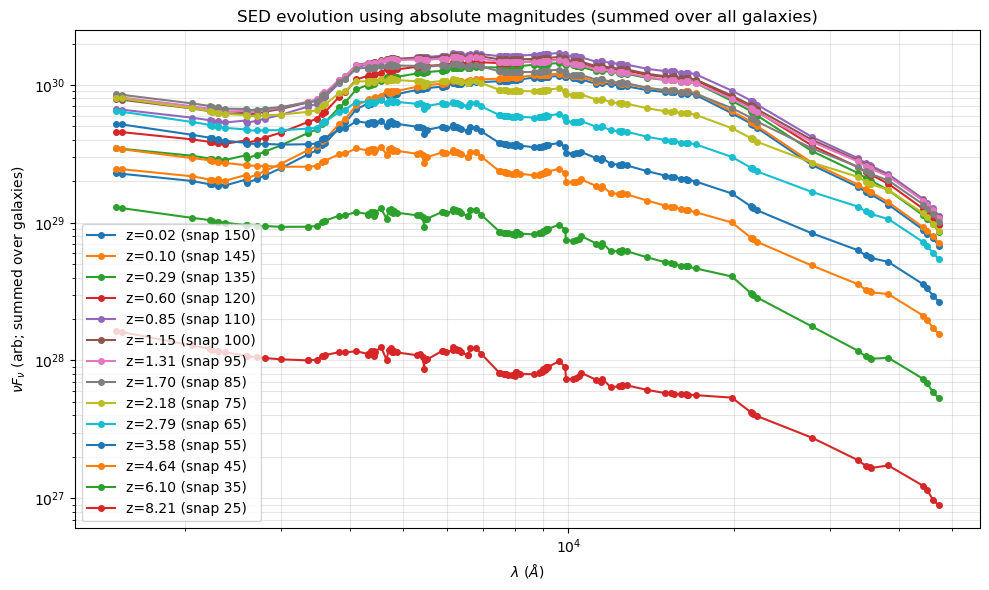

In [6]:
### Absolute magnitudes-based SED
snaps = list_snapshots()
snap_nums = [150, 145, 135, 120, 110, 100, 95, 85, 75, 65, 55, 45, 35, 25]  # adjust as desired

plt.figure(figsize=(10, 6))

for snap, path in snaps:
    if snap not in snap_nums:
        continue

    obj = caesar.load(str(path))
    z = get_redshift(obj)

    lam_AA, nuFnu, _ = compute_summed_sed_from_absmags(path)
    plt.loglog(lam_AA, nuFnu, marker="o", linewidth=1.5, markersize=4, label=f"z={z:.2f} (snap {snap})")

# plt.gca().invert_xaxis()  # optional: common in astronomy (short λ on right/left preference)
plt.xlabel(r"$\lambda$ ($\AA$)")
plt.ylabel(r"$\nu F_\nu$ (arb; summed over galaxies)")
plt.title("SED evolution using absolute magnitudes (summed over all galaxies)")
plt.grid(True, alpha=0.3, which="both")
plt.legend()
plt.tight_layout()
plt.show()

yt : [INFO     ] 2026-01-30 15:28:00,102 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_148.hdf5
yt : [INFO     ] 2026-01-30 15:28:00,680 Found 58598 halos
yt : [INFO     ] 2026-01-30 15:28:01,349 Found 6809 galaxies
yt : [INFO     ] 2026-01-30 15:28:01,991 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_120.hdf5
yt : [INFO     ] 2026-01-30 15:28:02,001 Found 62959 halos
yt : [INFO     ] 2026-01-30 15:28:02,006 Found 5475 galaxies
yt : [INFO     ] 2026-01-30 15:28:02,458 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_080.hdf5
yt : [INFO     ] 2026-01-30 15:28:03,036 Found 68016 halos
yt : [INFO     ] 2026-01-30 15:28:03,416 Found 3908 galaxies
yt : [INFO     ] 2026-01-30 15:28:03,935 Opening /home/spujni/sim/m50n512/s50/Groups/m50n512_050.hdf5
yt : [INFO     ] 2026-01-30 15:28:04,476 Found 48604 halos
yt : [INFO     ] 2026-01-30 15:28:05,019 Found 2379 galaxies


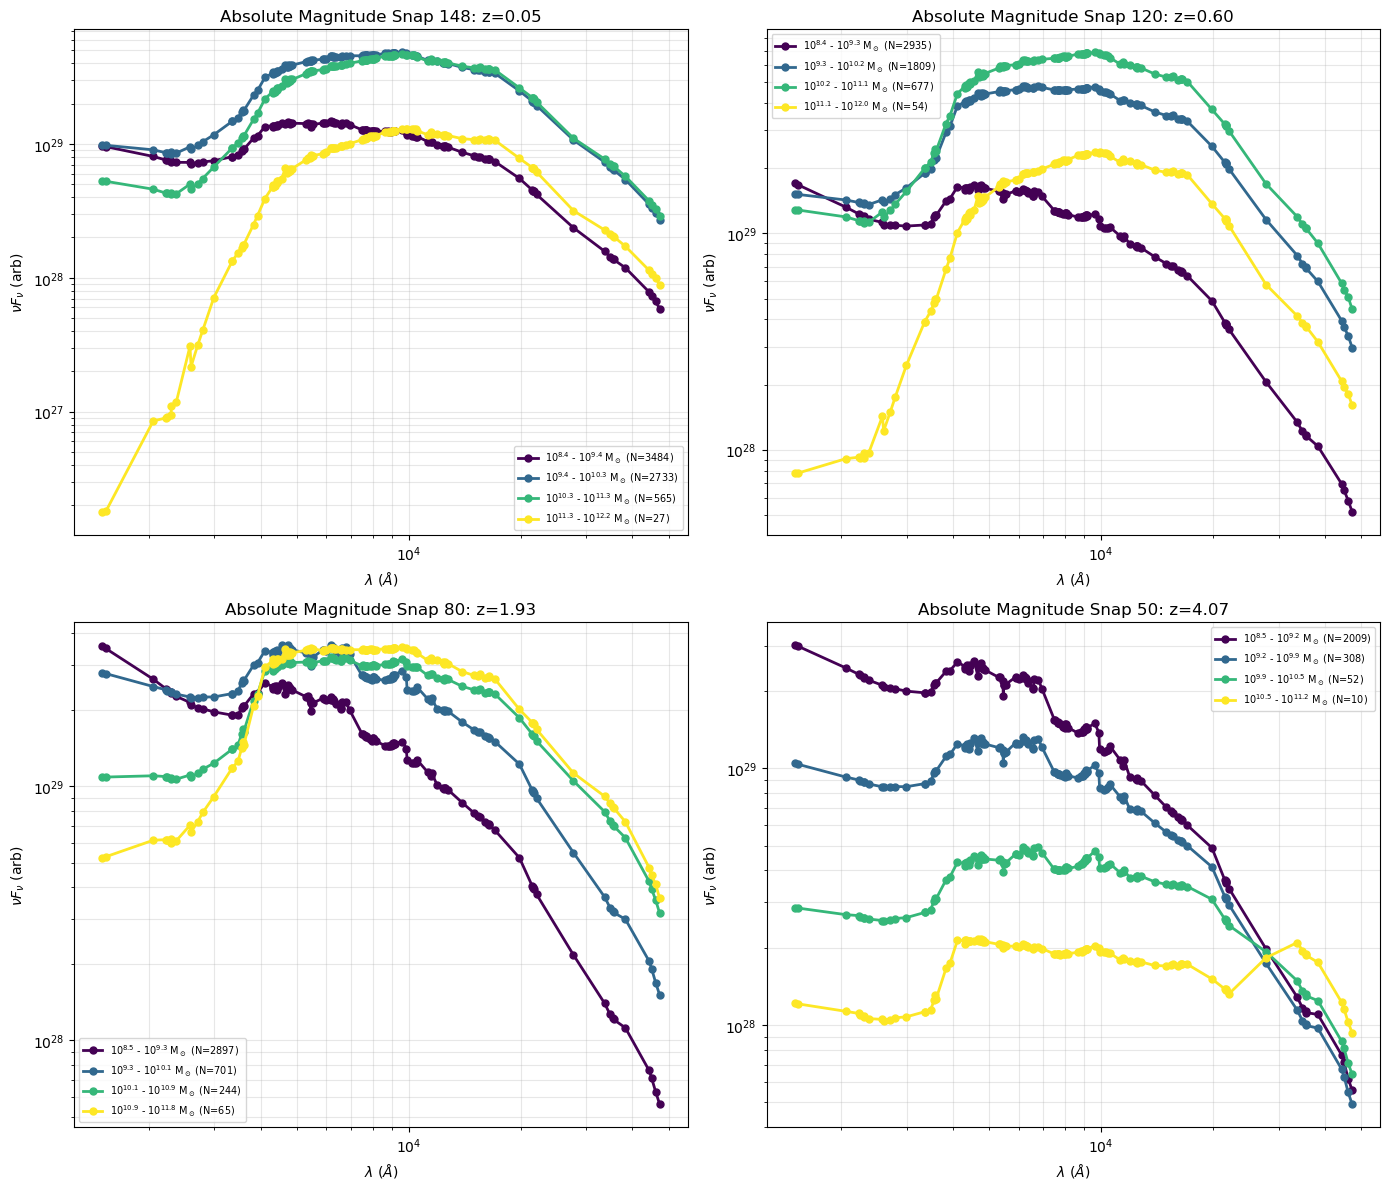

In [7]:
### SED by stellar mass bin - 4 snapshots comparison
snap_targets = [148, 120, 80, 50]
snaps = list_snapshots()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, snap_target in enumerate(snap_targets):
    for snap, path in snaps:
        if snap == snap_target:
            z = get_redshift(caesar.load(str(path)))
            break
    
    # Get stellar masses
    with h5py.File(path, "r") as f:
        stellar_mass = f["galaxy_data/dicts/masses.stellar"][:]
    
    # Create mass bins
    bin_indices, bins = get_stellar_mass_bins(stellar_mass, n_bins=4)
    
    # Plot SEDs for each mass bin
    ax = axes[idx]
    colors = plt.cm.viridis(np.linspace(0, 1, len(bins) - 1))
    
    for i in range(len(bins) - 1):
        mask = bin_indices == i
        n_gal = mask.sum()
        
        if n_gal == 0:
            continue
        
        lam_AA, nuFnu, _ = compute_summed_sed_from_absmags(path, mask=mask)
        
        label = f"$10^{{{np.log10(bins[i]):.1f}}}$ - $10^{{{np.log10(bins[i+1]):.1f}}}$ M$_\\odot$ (N={n_gal})"
        ax.loglog(lam_AA, nuFnu, marker="o", linewidth=2, markersize=5, color=colors[i], label=label)
    
    ax.set_xlabel(r"$\lambda$ ($\AA$)")
    ax.set_ylabel(r"$\nu F_\nu$ (arb)")
    ax.set_title(f"Absolute Magnitude Snap {snap_target}: z={z:.2f}")
    ax.legend(fontsize=7)
    ax.grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()


In [ ]:
### SED by stellar mass bin - 4 snapshots comparison
snap_targets = [148, 120, 80, 50]
snaps = list_snapshots()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, snap_target in enumerate(snap_targets):
    for snap, path in snaps:
        if snap == snap_target:
            z = get_redshift(caesar.load(str(path)))
            break
    
    # Get stellar masses
    with h5py.File(path, "r") as f:
        stellar_mass = f["galaxy_data/dicts/masses.stellar"][:]
    
    # Create mass bins
    bin_indices, bins = get_stellar_mass_bins(stellar_mass, n_bins=4)
    
    # Plot SEDs for each mass bin
    ax = axes[idx]
    colors = plt.cm.viridis(np.linspace(0, 1, len(bins) - 1))
    
    for i in range(len(bins) - 1):
        mask = bin_indices == i
        n_gal = mask.sum()
        
        if n_gal == 0:
            continue
        
        lam_AA, nuFnu, _ = compute_summed_sed_from_appmags(path, mask=mask)
        
        label = f"$10^{{{np.log10(bins[i]):.1f}}}$ - $10^{{{np.log10(bins[i+1]):.1f}}}$ M$_\\odot$ (N={n_gal})"
        ax.loglog(lam_AA, nuFnu, marker="o", linewidth=2, markersize=5, color=colors[i], label=label)
    
    ax.set_xlabel(r"$\lambda$ ($\AA$)")
    ax.set_ylabel(r"$\nu F_\nu$ (arb)")
    ax.set_title(f"Apparent Magnitude Snap {snap_target}: z={z:.2f}")
    ax.legend(fontsize=7)
    ax.grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()


In [ ]:
### SED comparison: Star-forming vs Quenched across 4 redshifts
snap_targets = [148, 120, 80, 50]
snaps = list_snapshots()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, snap_target in enumerate(snap_targets):
    # Find the target snapshot
    for snap, path in snaps:
        if snap == snap_target:
            z = get_redshift(caesar.load(str(path)))
            break
    
    # Classify galaxies
    classifications = classify_galaxies(path)
    
    # Star-forming
    lam_AA_sf, nuFnu_sf, _ = compute_summed_sed_from_absmags(path, mask=classifications['star_forming'])
    axes[idx].loglog(lam_AA_sf, nuFnu_sf, marker="o", linewidth=2, markersize=5, 
                     color="blue", label=f"Star-forming (N={classifications['star_forming'].sum()})")
    
    # Quenched
    lam_AA_q, nuFnu_q, _ = compute_summed_sed_from_absmags(path, mask=classifications['quenched'])
    axes[idx].loglog(lam_AA_q, nuFnu_q, marker="s", linewidth=2, markersize=5, 
                     color="red", label=f"Quenched (N={classifications['quenched'].sum()})")
    
    axes[idx].set_title(f"z={z:.2f} (Absolute Magnitude Snap {snap_target})")
    axes[idx].set_xlabel(r"$\lambda$ ($\AA$)")
    axes[idx].set_ylabel(r"$\nu F_\nu$ (arb)")
    axes[idx].grid(True, alpha=0.3, which="both")
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
### SED comparison: Star-forming vs Quenched across 4 redshifts
snap_targets = [148, 120, 80, 50] 
snaps = list_snapshots()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, snap_target in enumerate(snap_targets):
    # Find the target snapshot
    for snap, path in snaps:
        if snap == snap_target:
            z = get_redshift(caesar.load(str(path)))
            break
    
    # Classify galaxies
    classifications = classify_galaxies(path)
    
    # Star-forming
    lam_AA_sf, nuFnu_sf, _ = compute_summed_sed_from_appmags(path, mask=classifications['star_forming'])
    axes[idx].loglog(lam_AA_sf, nuFnu_sf, marker="o", linewidth=2, markersize=5, 
                     color="blue", label=f"Star-forming (N={classifications['star_forming'].sum()})")
    
    # Quenched
    lam_AA_q, nuFnu_q, _ = compute_summed_sed_from_appmags(path, mask=classifications['quenched'])
    axes[idx].loglog(lam_AA_q, nuFnu_q, marker="s", linewidth=2, markersize=5, 
                     color="red", label=f"Quenched (N={classifications['quenched'].sum()})")
    
    axes[idx].set_title(f"z={z:.2f} (Apparent Magnitude Snap {snap_target})")
    axes[idx].set_xlabel(r"$\lambda$ ($\AA$)")
    axes[idx].set_ylabel(r"$\nu F_\nu$ (arb)")
    axes[idx].grid(True, alpha=0.3, which="both")
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.show()